In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Data Exploration and Preprocessing

In [2]:
df = pd.read_csv('Alphabets_data.csv')
df

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3       5      1     8    13      0      6   
1          I     5    12      3       7      2    10     5      5      4   
2          D     4    11      6       8      6    10     6      2      6   
3          N     7    11      6       6      3     5     9      4      6   
4          G     2     1      3       1      1     8     6      6      6   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19995      D     2     2      3       3      2     7     7      7      6   
19996      C     7    10      8       8      4     4     8      6      9   
19997      T     6     9      6       7      5     6    11      3      7   
19998      S     2     3      4       2      1     8     7      2      6   
19999      A     4     9      6       6      2     9     5      3      1   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          6      10       8      0       8      0       8  
1         13       3       9      2       8      4      10  
2         10       3       7      3       7      3       9  
3          4       4      10      6      10      2       8  
4          6       5       9      1       7      5      10  
...      ...     ...     ...    ...     ...    ...     ...  
19995      6       6       4      2       8      3       7  
19996     12       9      13      2       9      3       7  
19997     11       9       5      2      12      2       4  
19998     10       6       8      1       9      5       8  
19999      8       1       8      2       7      2       8  

[20000 rows x 17 columns]

In [3]:
df.shape

(20000, 17)

In [4]:
df.size

340000

In [5]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [6]:
# Summarize key features
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1] - 1)  # excluding the label column
print("Number of classes:", df['letter'].nunique())

Number of samples: 20000
Number of features: 16
Number of classes: 26


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [8]:
# Normalize the data
label_encoder = LabelEncoder()
df['letter'] = label_encoder.fit_transform(df['letter'])

In [9]:
# Separate features and target variable
features = df.drop('letter', axis=1)
target = df['letter']


In [10]:
# Normalize the data
scaler = StandardScaler()
f_scaled = scaler.fit_transform(features)

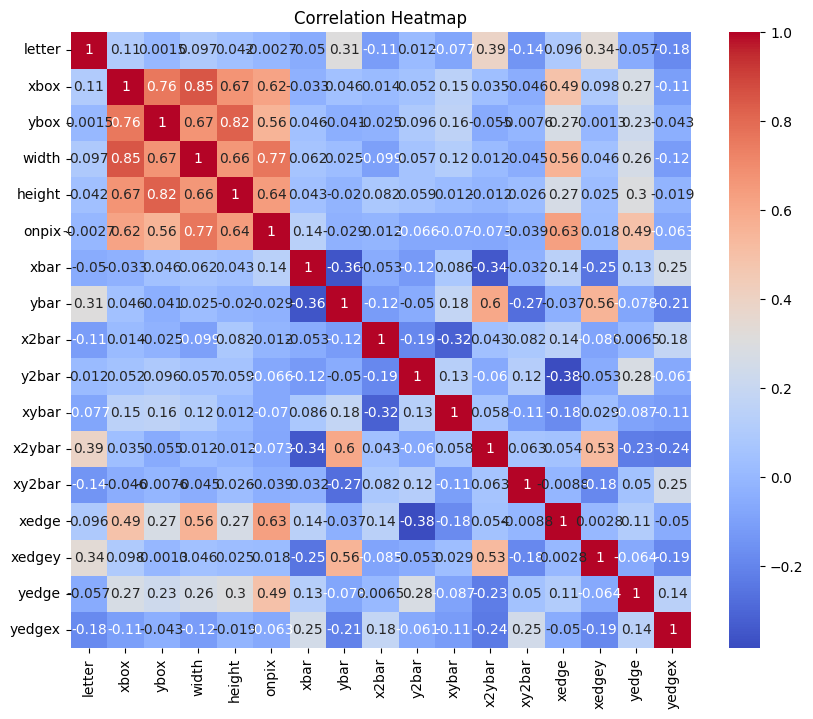

In [11]:
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2. Model Implementation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [13]:
x_train, x_test, y_train, y_test = train_test_split(f_scaled,target,train_size=0.8,random_state=42)

In [14]:
!pip install tensorflow

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
# Define a basic ANN model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(np.unique(target)), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Initialize and train the model
model = create_model()
model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4320 - loss: 2.0383
Epoch 2/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7704 - loss: 0.7422
Epoch 3/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8346 - loss: 0.5516
Epoch 4/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8627 - loss: 0.4486
Epoch 5/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8814 - loss: 0.3933
Epoch 6/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8982 - loss: 0.3336
Epoch 7/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9103 - loss: 0.3019
Epoch 8/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9126 - loss: 0.2750
Epoch 9/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9206 - loss: 0.2530
Epoch 10/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9291 - loss: 0.2261
Epoch 11/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9299 - loss: 0.2247
Epoch 12/50
1600/1600 ━━━━━━━━

In [ ]:
# Evaluate the model on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 3. Hyperparameter Tuning

In [ ]:
!pip install scikeras

In [ ]:
from tensorflow import keras
from sklearn.model_selection import GridSearchCV

In [ ]:
pip install -q -U keras-tuner

In [ ]:
from keras_tuner import RandomSearch

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='alphabet_tuning')

In [ ]:
tuner.search(x_train,y_train, epochs=50, batch_size=10, verbose=1)

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}, Best units2: {best_hps.get('units2')}, Best learning_rate: {best_hps.get('learning_rate')}")

In [ ]:
# Build the best model with optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

In [ ]:
# Train the model
best_model.fit(x_train,y_train, epochs=50, batch_size=10, verbose=1)

# 4. Evaluation

In [ ]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

In [ ]:
y_pred_best = np.argmax(best_model.predict(x_test), axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_best, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_best, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

In [ ]:
print("Model Evaluation Summary:")
print("The tuned ANN model achieved an accuracy of {:.2f}%, a precision of {:.2f}%, a recall of {:.2f}%, and an F1 score of {:.2f}% on the test set.".format(
    accuracy_score(y_test, y_pred_best) * 100,
    precision_score(y_test, y_pred_best, average='weighted') * 100,
    recall_score(y_test, y_pred_best, average='weighted') * 100,
    f1_score(y_test, y_pred_best, average='weighted') * 100
))

print("The performance of the tuned model is improved compared to the default model, demonstrating the effectiveness of hyperparameter tuning.")
